## Ejercicios en Clase: Parte 1

#### Dado el conjunto de datos Forest-Fires-Data (AVAC), realice el cálculo de la covarianza empleando Excel o Python. Deberá considerar las variables: viento (wind) y humedad relativa (rH).

In [35]:
##Importar Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

data_forest = pd.read_csv('forestfires.csv')
data_forest.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


#### Calculo de la covarianza

In [36]:
data_viento = data_forest['wind']
data_humedad = data_forest['RH']

covarianza = np.cov(data_viento, data_humedad)[0][1]
#covarianza = np.cov(data_viento, data_humedad)
covarianza

2.0292197082152543

#### Grafica de la Dispersion

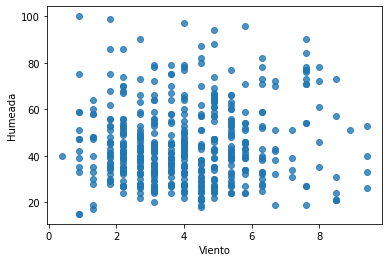

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data_viento, y=data_humedad, alpha= 0.8)
ax.set_xlabel('Viento')
ax.set_ylabel('Humeada');

#### Conclusion
Colocar informacion aqui xd

## Ejercicios en Clase: Parte 2

#### Dado el conjunto de datos Forest-Fires-Data (AVAC),realice el cálculo del coeficiente de correlación lineal de Pearson empleando Excel o Python. Deberá considerar las variables: viento (wind) y humedad relativa (rH). 

In [38]:
r, p = stats.pearsonr(data_viento, data_humedad)
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.06941006715607248, p-value=0.11495617958985781


In [44]:
X = data_forest[['wind']]
y = data_humedad

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [46]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.384
Date:                Wed, 25 May 2022   Prob (F-statistic):              0.123
Time:                        00:06:14   Log-Likelihood:                -1742.9
No. Observations:                 413   AIC:                             3490.
Df Residuals:                     411   BIC:                             3498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5123      1.991     20.847      0.0

In [47]:
modelo.conf_int(alpha=0.05)

array([[37.59793815, 45.42674382],
       [-0.18726323,  1.55828336]])

In [48]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,42.746259,1.303002,40.184880,45.307638,10.205470,75.287048
1,42.746259,1.303002,40.184880,45.307638,10.205470,75.287048
2,43.980177,0.841268,42.326452,45.633902,11.498227,76.462128
3,44.254381,0.813133,42.655963,45.852800,11.775200,76.733563


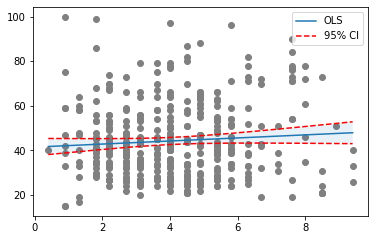

In [49]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();